Read the data from the file
Create the path (should be the one use above, with the specific file that you will read from).

Use this path to read the dat from the file. Decide how you will do this and what format would you like the data returned as.

Spend some time looking at the data and deciding how you will "clean" the data.

Which columns of data are of interest and wich will be ignored
What are the data types currently and what do you want them to be
What data do you want and how will you store the data you choose
How will you convert the data that needs changing
Is there any missing or unusual data? How will you handle this?
Other?



Create a convert_temp function
The temperatures, in the data, are in degrees Celsius and mulitplied by 10 so there are no decimals in the data. Create a function to convert a given temp to a temp in degrees Fahrenheit, rounded to one decimal place.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open('../input/portland-weather/PortlandWeather2013b.txt') as f:
    file = f.readlines()
    
def cel_to_far(temp):
    temp = temp/10
    faren = (temp * 1.8) + 32
    faren = round(faren, 1)
    return faren
    
dict = {"date":[], "min_temp":[], "max_temp":[]}
the_list = []
    
for num in range(2):
    file.pop(0)

for item in file:
    item_list = item.split()
    the_list.append(item_list)
    
for i in range(len(the_list)) :
    min_cel = int(the_list[i][6])
    min = cel_to_far(min_cel)
    
    max_cel = int(the_list[i][5])
    max = cel_to_far(max_cel)
    
    dict["date"].append(the_list[i][1])
    dict["min_temp"].append(min)
    dict["max_temp"].append(max)

Subplots of Daily High and Daily Low Temperatures
Create a Numpy array of numbers from 1 - 365, to be used for the x-axis
x- and y-axes should share the same values
label the axes and title the plot
use a scatterplot to display the data

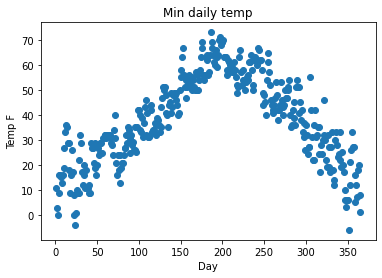

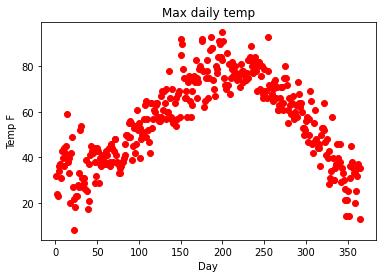

In [2]:
plt.scatter(range(1,366), dict["min_temp"])
plt.title("Min daily temp")
plt.xlabel("Day")
plt.ylabel("Temp F")
plt.show()
plt.scatter(range(1,366), dict["max_temp"], c="red")
plt.title("Max daily temp")
plt.xlabel("Day")
plt.ylabel("Temp F")
plt.show()

Moving Averages Function
Write a function simple_moving_avg that takes a list of values and a period (number of days) and returns a list containing the moving averages of the original list for the given period length.

In [3]:
def simple_moving_average(values, days):
    averages = []
    aver = 0
    for i in range(0,len(values)+1-days):
        for num in range(i,days+i):
            aver += values[num]
        aver = aver/days
        aver = round(aver,2)
        averages.append(aver)
        aver-=aver
            
    return averages

Hi/Low Temp 10-day Moving averages
Use the function to find the 10-day moving average for high and low temperatures and plot them on the same graph.

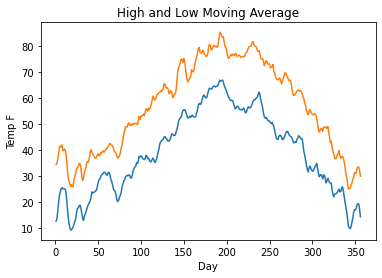

In [4]:
avg_low = simple_moving_average(dict["min_temp"], 10)
avg_high = simple_moving_average(dict["max_temp"], 10)

plt.plot(range(1,357), avg_low)
plt.plot(range(1,357), avg_high)
plt.title("High and Low Moving Average")
plt.xlabel("Day")
plt.ylabel("Temp F")
plt.show()

Find the average high and low temperature for each month. Store each in its own list.

In [5]:
def month_avg(month, temp):
    year = "20130"
    if len(month) > 1:
        year = "2013"
    index_count = []
    temp_add = 0
    average= 0
        
    for item in dict["date"]:
         if year+month in item:
            index_count.append(dict["date"].index(item))
            
    if temp == "high":
        for num in index_count:
            temp_add += dict["max_temp"][num]
            
    else:
        for num in index_count:
            temp_add += dict["min_temp"][num]
        
    average = temp_add / index_count[len(index_count)-1]
    average = round(average,2)
    
    return average

month_high = []
month_low = []

for num in range(1,13):
    temp_h = month_avg(str(num), "high")
    temp_l = month_avg(str(num), "low")
    month_high.append(temp_h)
    month_low.append(temp_l)
    
print(month_high, month_low)

[35.43, 16.94, 14.69, 13.44, 13.22, 12.28, 11.72, 10.0, 7.76, 6.27, 4.18, 2.69] [16.97, 10.11, 9.54, 8.84, 9.13, 9.33, 9.32, 7.34, 5.43, 4.17, 2.58, 1.48]


Plot the monthly averages as a Bar plot with both high and low temps on the same graph.

Look at pyplot documentation under .xticks to learn how to rotate the month names so they are more readable

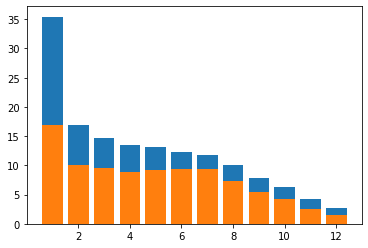

In [6]:
plt.bar(range(1,13),month_high)
plt.bar(range(1,13),month_low)
plt.show()